In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

In [3]:
# importing dataset

df = pd.read_excel("DATA SET LEAD.xlsx")

In [4]:
df

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,46603.0,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,2022-09-01,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604.0,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,2022-09-29,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605.0,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,2022-09-

In [5]:
df.dtypes

Unnamed: 0               float64
Agent_id                  object
status                    object
lost_reason               object
budget                    object
lease                     object
movein            datetime64[ns]
source                    object
source_city               object
source_country            object
utm_source                object
utm_medium                object
des_city                  object
des_country               object
room_type                 object
lead_id                   object
dtype: object

In [6]:
# dropping columns not needed 
# source city and destination city are removed because they are have a relation with source country and destination country 
# and including them will make label encoding complex 
# budget and lease can be further splitted and can be made into bins with various categories 
# in this project I chose to remove them alltogether 




df=df.drop(['Unnamed: 0','Agent_id','movein', 'lead_id','source_city','des_city','budget','lease'], axis=1)

In [7]:
df

,status,lost_reason,source,source_country,utm_source,utm_medium,des_country,room_type
0,LOST,Not responding,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
1,LOST,Low budget,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
2,LOST,Not responding,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
3,LOST,Low budget,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
4,LOST,Junk lead,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN
...,...,...,...,...,...,...,...,...
46603,LOST,Low availability,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
46604,LOST,Semester stay,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
46605,LOST,Low availability,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
46606,LOST,Low availability,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN


In [8]:
# Filling null values with mode values for the column . 
# Alternatively in every column customised values can be filled as well 
# for example room type can be filled based on the values of budget 
# given the values of most column is encrypted I chose to go with filling them with mode . 



df['lost_reason'].fillna(df['lost_reason'].mode()[0], inplace=True)
df['source'].fillna(df['source'].mode()[0], inplace=True)
df['source_country'].fillna(df['source_country'].mode()[0], inplace=True)
df['utm_source'].fillna(df['utm_source'].mode()[0], inplace=True)
df['utm_medium'].fillna(df['utm_medium'].mode()[0], inplace=True)
df['des_country'].fillna(df['des_country'].mode()[0], inplace=True)
df['room_type'].fillna(df['room_type'].mode()[0], inplace=True)

#### CHECKING FOR UNIQUE VALUES IN COLUMNS WHICH WILL GIVE US AN IDEA ON WORKING OF LABEL ENCODER

In [9]:
df.lost_reason.value_counts()

Low availability                  12256
Not responding                     7827
Not interested                     6449
Low budget                         5505
Wants private accommodation        2781
Short stay                         2264
Not a student                      1518
Just Enquiring                     1263
Inadequate details                  827
Semester stay                       817
Booked with manager                 676
Junk lead                           629
Booked on campus accommodation      613
Supply issue                        538
No supply                           534
Not serving in that region          411
Repeat lead                         394
Booked with competitor              356
Not going to university             329
Distance issue                      219
Junk lead/ Just Enquiring           147
Lead issue                          127
Looking for admission                41
Didn't respond in time               35
Visa/admission denied                17


In [10]:
df.room_type.value_counts()

Ensuite         36024
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [11]:
df.des_country.value_counts()

8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19    42674
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     2537
02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae      743
80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03      162
be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8      149
7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153      114
c1ef40ce0484c698eb4bd27fe56c1e7b68d74f9780ed674210d0e5013dae45e9       77
5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc       57
49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd       26
abd149214539d9f222d25de6358735b9fa0efd3956f66102b2c119ae2d9f6348       23
8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49aa09b406768467db228       22
4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d       17
3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7        4
2275583196d791405892aaca0d87743c872f3f

In [12]:
df.utm_medium.value_counts()

09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c    31761
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     3187
09bc8f0bb77bdddeb98527a39e995c2c605166399c178cb296992abab8415d5b     1762
69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa7fb632207f68215647     1658
268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef1ac5f72c85d3f2caa9     1627
                                                                    ...  
974f37cbfab65a440154a8435e81f1928b6cf003b2885291e7c6fddd530ede65        1
6a3aea19761ac8238e4e1d298f15207fe12375f13cb79dfba243aabed36163ca        1
ad89c0825db17eb2c0b1a0d1a04f712b1c531ac84a6c92901a7f29e96adae9ce        1
511f27cf310544befd3236d40f86ec47f539c4722370acde0f4df8b6616c8553        1
5f5238f61f941641a13c52f68a37a1de3e3d981b57506b82aa36d5b85d09c8b7        1
Name: utm_medium, Length: 64, dtype: int64

In [13]:
df.utm_source.value_counts()

bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3    31125
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490     4764
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     1982
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3     1748
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579     1529
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7     1256
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1     1049
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158      864
44574c4ba2ea74ad4bf1e184133cdbf4e7390a3690beff6a7364511a70ec208e      547
4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221694b2a96f9ecd8d717      445
5ede56738376a8c53a7c99bf275b077a5c10df780a20cf3d8282fd59a2a9fb56      236
3f40462915a3e6026a4d790127b95ded4d870f6ab18d9af2fcbc454168255237      173
7edb360f06acaef2cc80dba16cf563f199d347db4443da04da0c8173e3f9e4ed      173
ce43ccb66a63d70dd24b992aedbea52eee4229

In [14]:
df.status.value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [15]:
# replacing the given value with NAN 




df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan, inplace=True)

In [16]:
# checking for null values 

df.isnull().sum()

status               0
lost_reason          0
source            5977
source_country    8641
utm_source          61
utm_medium        3187
des_country       2537
room_type            0
dtype: int64

In [17]:
# storing index values of status with opportunity , contracted , processing , important in a separate variable and deleting those.



status = df[(df['status']=='OPPORTUNITY') | (df['status']=='CONTACTED') | (df['status']=='PROCESSING') | (df['status']=='IMPORTANT')].index

In [18]:
status

Int64Index([  182,   613,   820,   896,  1419,  1546,  1580,  1635,  2003,
             2268,
            ...
            44373, 44378, 44459, 44837, 44956, 45491, 45512, 45698, 46022,
            46032],
           dtype='int64', length=291)

In [19]:
df.drop(status,inplace=True)

In [20]:
df

,status,lost_reason,source,source_country,utm_source,utm_medium,des_country,room_type
0,LOST,Not responding,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
1,LOST,Low budget,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
2,LOST,Not responding,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
3,LOST,Low budget,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
4,LOST,Junk lead,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,Ensuite
...,...,...,...,...,...,...,...,...
46603,LOST,Low availability,NaN,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
46604,LOST,Semester stay,NaN,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
46605,LOST,Low availability,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio
46606,LOST,Low availability,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite


#### USING LABEL ENCODER FOR THE COLUMNS AND CONVERTING THEM TO NUMERIC VALUES BASED ON LEVELS OF CATEGORIES IN A COLUMNS

In [21]:
df['status']=label_encoder.fit_transform(df['status'])
df['lost_reason']=label_encoder.fit_transform(df['lost_reason'])
df['source']=label_encoder.fit_transform(df['source'])
df['source_country']=label_encoder.fit_transform(df['source_country'])
df['utm_source']=label_encoder.fit_transform(df['utm_source'])
df['utm_medium']=label_encoder.fit_transform(df['utm_medium'])
df['des_country']=label_encoder.fit_transform(df['des_country'])
df['room_type']=label_encoder.fit_transform(df['room_type'])

#### SPLITTING DATA INTO X AND Y 

In [22]:
y= df['status']
y

0        0
1        0
2        0
3        0
4        0
        ..
46603    0
46604    0
46605    0
46606    0
46607    0
Name: status, Length: 46317, dtype: int32

In [23]:
x = df.drop(['status'],axis=1)
x

,lost_reason,source,source_country,utm_source,utm_medium,des_country,room_type
0,21,682,184,5,10,8,0
1,16,682,184,5,10,8,0
2,21,343,165,25,3,8,0
3,16,507,165,25,3,8,0
4,8,682,184,5,10,14,0
...,...,...,...,...,...,...,...
46603,15,682,100,25,3,8,3
46604,24,682,100,25,3,8,3
46605,15,343,100,25,3,8,3
46606,15,578,133,19,49,8,0


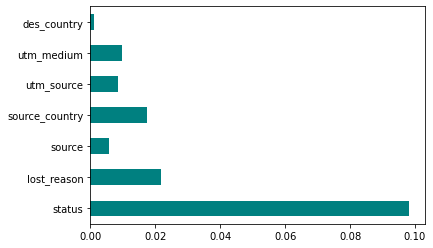

In [24]:
# FEATURE SELECTION AND IMPORTANCE GRAPH 



importances = mutual_info_classif(x,y)
feat_importances = pd.Series(importances , df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [25]:
# SPLITING DATA INTO TRANING AND TESTING 


x_train , x_test,y_train , y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5050)


In [26]:
# INITIALIZATION OF RANDOM FOREST 
# FEEDING VALUES OF TRAINING TESTING TO MODEL 


num_estimators = 100 
min_samples =4 
rf = RandomForestClassifier(n_estimators=num_estimators,min_samples_split=min_samples)
rf.fit(x_train,y_train.values.ravel())


RandomForestClassifier(min_samples_split=4)

In [27]:
# METRICS CALCULATIONS 




y_test_pred = rf.predict(x_test)
accuracy=metrics.accuracy_score(y_test,y_test_pred)
auc_score=metrics.roc_auc_score(y_test,y_test_pred)

print(accuracy)
print(auc_score)

0.9466753022452504
0.7484192586670955


In [28]:
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
confusion_matrix

array([[12683,   306],
       [  435,   472]], dtype=int64)

In [29]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12989
           1       0.61      0.52      0.56       907

    accuracy                           0.95     13896
   macro avg       0.79      0.75      0.77     13896
weighted avg       0.94      0.95      0.94     13896

